    Prepare a model for glass classification using KNN

    Data Description:
    
    RI : refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    AI: Aluminum
    Si: Silicon
    K:Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron

    Type: Type of glass: (class attribute)
    
    1 -- building_windows_float_processed
    2 --building_windows_non_float_processed
    3 --vehicle_windows_float_processed
    4 --vehicle_windows_non_float_processed (none in this database)
    5 --containers
    6 --tableware
    7 --headlamps

### Importing the Required Libraries 

In [1]:
# Importing the basic libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from numpy import set_printoptions 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Performing EDA on the data

In [3]:
# to get the information of the datafile
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
# summarizing the datafile
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
# to check the null values of the data
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
print("Dimensions -",glass.shape)
print("Column names -",glass.columns)

Dimensions - (214, 10)
Column names - Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [7]:
# summarising the information using crosstab
pd.crosstab(glass['Al'],glass['Type']).mean()

Type
1    0.593220
2    0.644068
3    0.144068
5    0.110169
6    0.076271
7    0.245763
dtype: float64

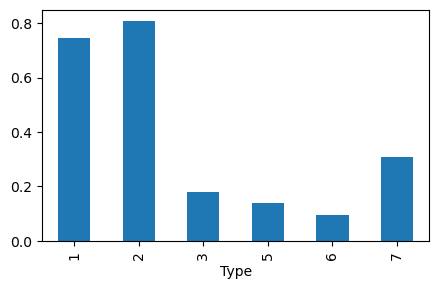

In [8]:
# Plotting barplot using crosstab function
plt.figure(figsize=(5,3))
pd.crosstab(glass['Mg'],glass['Type']).mean().plot(kind='bar');

In [9]:
# to check the dimensions of duplicates in the data
glass[glass.duplicated()].shape

(1, 10)

In [10]:
# to get the duplicate values from the data
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [11]:
# Removing the duplicates 
gl = glass.drop_duplicates()
gl.iloc[190:200]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
191,1.51602,14.85,0.0,2.38,73.28,0.00,8.76,0.64,0.09,7
192,1.51623,14.20,0.0,2.79,73.46,0.04,9.04,0.40,0.09,7
193,1.51719,14.75,0.0,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.0,1.98,73.29,0.00,8.52,1.57,0.07,7
195,1.51545,14.14,0.0,2.68,73.39,0.08,9.07,0.61,0.05,7
196,1.51556,13.87,0.0,2.54,73.23,0.14,9.41,0.81,0.01,7
197,1.51727,14.70,0.0,2.34,73.28,0.00,8.95,0.66,0.00,7
198,1.51531,14.38,0.0,2.66,73.10,0.04,9.08,0.64,0.00,7
199,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.00,7
200,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.00,7


In [12]:
# Resetting the index
gl = gl.reset_index()
gl = gl.drop(columns="index")
gl.iloc[190:200]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
190,1.51602,14.85,0.0,2.38,73.28,0.00,8.76,0.64,0.09,7
191,1.51623,14.20,0.0,2.79,73.46,0.04,9.04,0.40,0.09,7
192,1.51719,14.75,0.0,2.00,73.02,0.00,8.53,1.59,0.08,7
193,1.51683,14.56,0.0,1.98,73.29,0.00,8.52,1.57,0.07,7
194,1.51545,14.14,0.0,2.68,73.39,0.08,9.07,0.61,0.05,7
195,1.51556,13.87,0.0,2.54,73.23,0.14,9.41,0.81,0.01,7
196,1.51727,14.70,0.0,2.34,73.28,0.00,8.95,0.66,0.00,7
197,1.51531,14.38,0.0,2.66,73.10,0.04,9.08,0.64,0.00,7
198,1.51609,15.01,0.0,2.51,73.05,0.05,8.83,0.53,0.00,7
199,1.51508,15.15,0.0,2.25,73.50,0.00,8.34,0.63,0.00,7


### Standardizing the data

In [13]:
from numpy import set_printoptions 
from sklearn.preprocessing import StandardScaler

array = gl.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.88  0.29  1.26 -0.71 -1.13 -0.67 -0.14 -0.35 -0.59 -0.85]
 [-0.24  0.6   0.64 -0.18  0.1  -0.03 -0.79 -0.35 -0.59 -0.85]
 [-0.72  0.15  0.6   0.18  0.43 -0.17 -0.83 -0.35 -0.59 -0.85]
 [-0.23 -0.24  0.7  -0.32 -0.06  0.11 -0.52 -0.35 -0.59 -0.85]
 [-0.31 -0.16  0.65 -0.42  0.55  0.08 -0.62 -0.35 -0.59 -0.85]]


### Train and Test Split 
    Splitting the data into Train and Test data

In [14]:
array = gl.values
X = array[:,:9]
y = array[:,9]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

### Grid Search for Tuning the Algorithm 

In [16]:
from sklearn.model_selection import GridSearchCV
# Creating array of integers from 1 to 39
n_neigh = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neigh)

In [17]:
# Instantiate a K-Nearest Neighbors classifier
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [18]:
# to print best score
print(grid.best_score_)
# to print best parameter
print(grid.best_params_)

0.64828349944629
{'n_neighbors': 1}


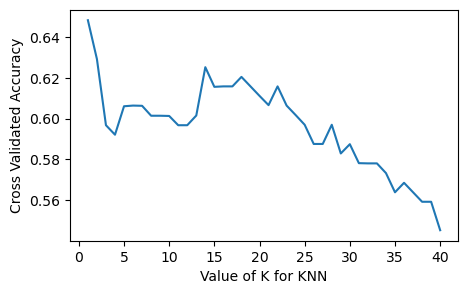

In [19]:
# Visualizing the accuracies of different K values
# Choose k between 1 - 41
k_range = range(1,41)
k_scores = []
# to calculate different k in models using iteration
# then returning the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
#plotting
plt.figure(figsize=(5,3))
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross Validated Accuracy")
plt.show()

### Building the KNN Model

In [20]:
# Fitting the K - Nearest Neighbors model
Knn = KNeighborsClassifier(n_neighbors=1)
Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# to get the predictions
pred = Knn.predict(X_test)
pred

array([7., 1., 2., 2., 1., 1., 7., 6., 7., 1., 7., 1., 3., 2., 2., 2., 2.,
       2., 7., 2., 2., 1., 3., 7., 1., 2., 2., 1., 2., 6., 3., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 7., 2., 3., 1., 7., 7., 2., 2., 2., 1.,
       2., 1., 2., 2., 1., 5., 2., 2., 7., 6., 2., 1., 2.])

In [22]:
# Confusion matrix for accuracy testing
confusion_matrix(y_test, pred)

array([[13,  2,  3,  0,  0,  0],
       [ 7, 22,  0,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  1, 10]], dtype=int64)

In [23]:
# to get the accuracy score
accuracy = accuracy_score(y_test, pred)
print((accuracy)*100)

75.0


In [24]:
print("The accuracy of the KNN classifier on test data is {:.2f}".format(Knn.score(X_test, y_test)*100))

The accuracy of the KNN classifier on test data is 75.00
